# ADA 442 Term Project

Abdullah Doğanay - 10549887192
Onur Uslu - 
Emirhan Yılmaz - 22303531098
Talha El Bah -

### Import Libraries

In [18]:
# ===============================
# 📦 General Purpose Libraries
# ===============================
import pandas as pd
import numpy as np
import time
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Disable warnings for cleaner output
warnings.filterwarnings("ignore")

# ===============================
# 🧹 Preprocessing & Transformation
# ===============================
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
# ===============================
# 🤖 Model Selection & Training
# ===============================
from sklearn.model_selection import train_test_split, GridSearchCV

# ===============================
# 🧠 Machine Learning Models
# ===============================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# ===============================
# 📊 Evaluation Metrics
# ===============================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
from sklearn.inspection import permutation_importance

# ===============================
# ⚖️ Resampling for Imbalance
# ===============================
from sklearn.utils import resample


### 1. Load the dataset

In [2]:
df = pd.read_csv('bank-additional.csv', sep=';')

print(df.describe())
print(df.info())
df

               age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.4000

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### 2. Data Cleaning


In [3]:
# Check for missing values
print(df.isnull().sum())

# Check data types and unique values
print(df.dtypes)
print(df.nunique())

# Drop duplicates if any
df.drop_duplicates(inplace=True)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
age    

### Exploratory Data Analysis (EDA)

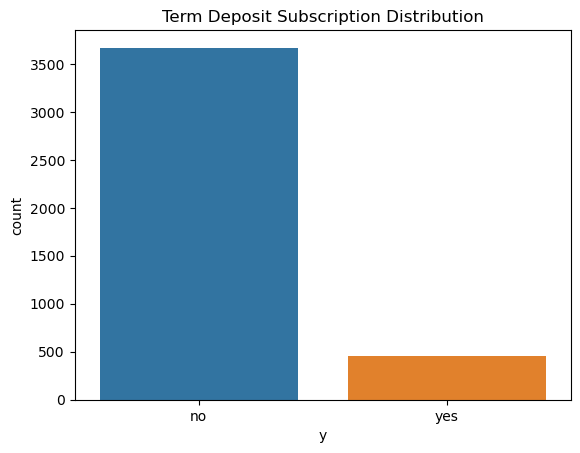

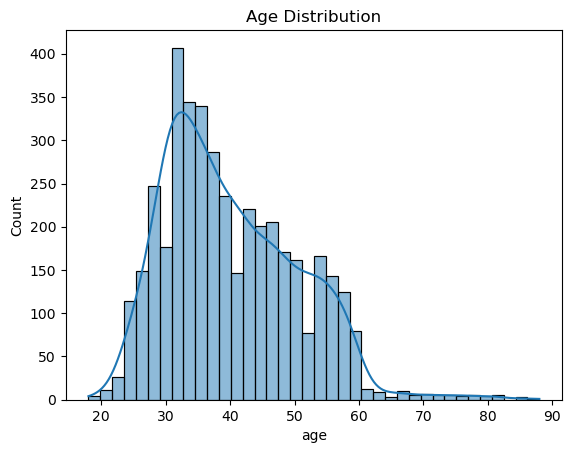

In [4]:
# Target variable distribution
sns.countplot(x='y', data=df)
plt.title("Term Deposit Subscription Distribution")
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


### 4. Feature Engineering

In [5]:

df['previous_contact'] = (df['pdays'] != 999).astype(int)
df.loc[df['previous_contact'] == 0, 'pdays'] = -1

df['unemployed'] = df['job'].isin(['student', 'retired', 'unemployed']).astype(int)

from sklearn.utils import resample

df_majority = df[df.y == 'no']
df_minority = df[df.y == 'yes']

df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=int(len(df_majority) * 0.5),
                                   random_state=42)

df_oversampled = pd.concat([df_majority, df_minority_oversampled])
df_oversampled['y'] = df_oversampled['y'].map({'no': 0, 'yes': 1})


### 3. Data Preprocessing

In [6]:
# Data Preprocessing

categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'day_of_week', 'poutcome']

df_oversampled = pd.get_dummies(df_oversampled, columns=categorical_columns, drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                      'euribor3m', 'nr.employed']
df_oversampled[numerical_features] = scaler.fit_transform(df_oversampled[numerical_features])


### 5. Finding the best model for our project.

##### We are making the necesseary imports and diveding our data as train and test data.

In [7]:
# Split the data

X = df_oversampled.drop('y', axis=1)
y = df_oversampled['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)


##### 5.1 Logistic Regression Model

Training Logistic Regression model
Logistic Regression Best Parameters: {'classifier__C': 1.0, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Logistic Regression Metrics:
Accuracy: 0.8765
Precision: 0.7830
Recall: 0.8650
F1 Score: 0.8220
AUC-ROC: 0.9471
Training time: 9.56 seconds

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       738
           1       0.78      0.87      0.82       363

    accuracy                           0.88      1101
   macro avg       0.86      0.87      0.86      1101
weighted avg       0.88      0.88      0.88      1101



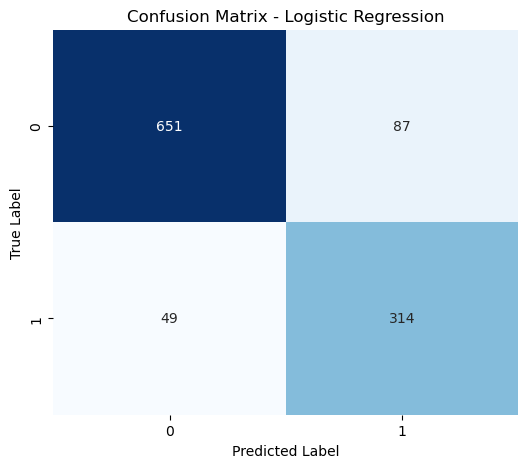

In [8]:
# This is the pipeline for Logistic Regression
# Random state number is set to 53, but the value can be changed to any number we decided,
# as long as it is the same in all parts of the code.
lr_pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=53))
])

# These are the parameters for grid search,
# which will be used to find the best parameters for the model.

lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__class_weight': ['balanced']

}

print("Training Logistic Regression model")
start_time = time.time()

# Grid search for hyperparameter tuning
lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train, y_train)
lr_time = time.time() - start_time

# In order to get the best logistic regression model,
lr_best = lr_grid.best_estimator_
lr_predictions = lr_best.predict(X_test)
lr_proba = lr_best.predict_proba(X_test)[:, 1]

# In order to evaluate the model, I will use the following metrics:

# Accuracy, among the all samples, how many were correctly predicted.
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Precision, among the samples predicted as positive, how many were actually positive.

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_auc = roc_auc_score(y_test, lr_proba)

# Recall, among the actual positive samples, how many were predicted as positive.
lr_recall = recall_score(y_test, lr_predictions)

# F1 Score, the harmonic mean of precision and recall.
lr_f1 = f1_score(y_test, lr_predictions)

# AUC-ROC, the area under the ROC curve, which measures the model's ability to distinguish between classes.
lr_auc = roc_auc_score(y_test, lr_proba)

print(f"Logistic Regression Best Parameters: {lr_grid.best_params_}")
print(f"Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"AUC-ROC: {lr_auc:.4f}")
print(f"Training time: {lr_time:.2f} seconds\n")
print(classification_report(y_test, lr_predictions))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##### 5.2 Random Forest Model

Training Random Forest model...
Random Forest Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Random Forest Metrics:
Accuracy: 0.9682
Precision: 0.9385
Recall: 0.9669
F1 Score: 0.9525
AUC-ROC: 0.9960
Training time: 14.82 seconds

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       738
           1       0.94      0.97      0.95       363

    accuracy                           0.97      1101
   macro avg       0.96      0.97      0.96      1101
weighted avg       0.97      0.97      0.97      1101



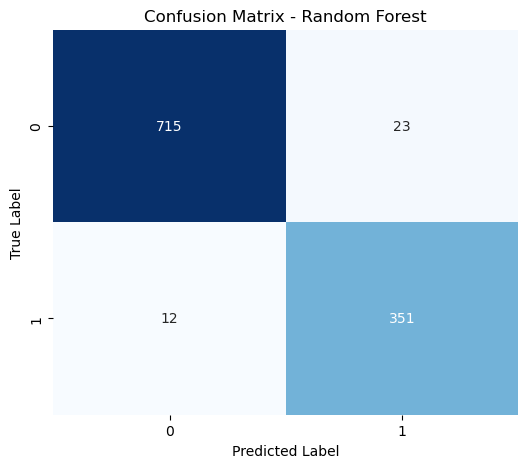

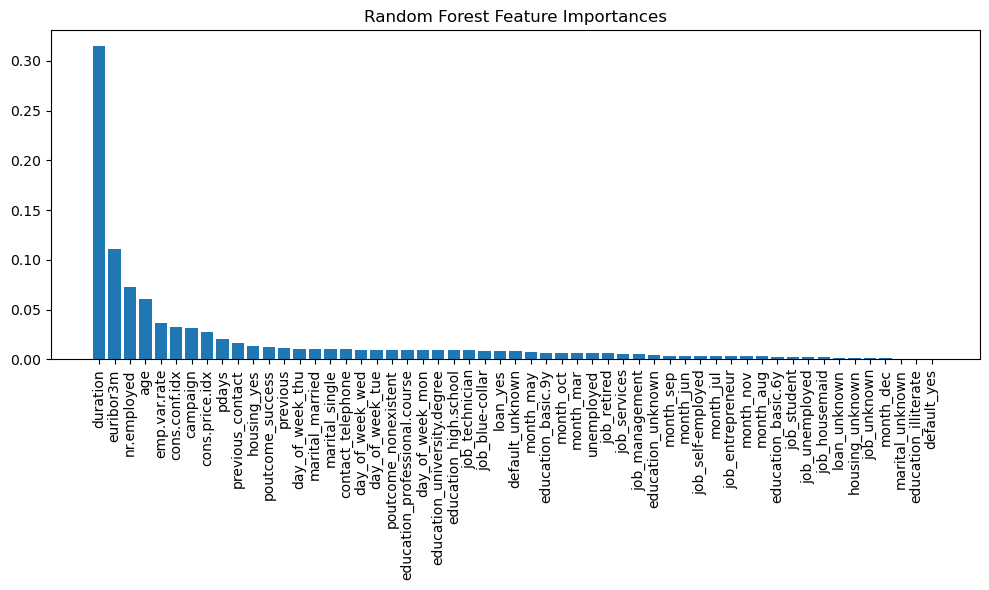

In [9]:
# Create Random Forest Pipeline
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=53))
])

# Define parameter grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 15],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Use GridSearchCV to find the best parameters
print("Training Random Forest model...")
start_time = time.time()
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_time = time.time() - start_time

# After the grid search, we can get the best model and make predictions.
# Get the best model
rf_best = rf_grid.best_estimator_
rf_predictions = rf_best.predict(X_test)
rf_proba = rf_best.predict_proba(X_test)[:, 1]

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_proba)

print(f"Random Forest Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_auc:.4f}")
print(f"Training time: {rf_time:.2f} seconds\n")
print(classification_report(y_test, rf_predictions))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
plt.figure(figsize=(10, 6))
importances = rf_best.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Random Forest Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

##### 5.3 Neural Network Model

Training Neural Network model
Neural Network Best Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.01, 'classifier__early_stopping': True, 'classifier__hidden_layer_sizes': (100, 100, 50), 'classifier__learning_rate': 'adaptive', 'classifier__max_iter': 500, 'classifier__n_iter_no_change': 10, 'classifier__solver': 'adam'}
Neural Network Metrics:
Accuracy: 0.9473
Precision: 0.9067
Recall: 0.9366
F1 Score: 0.9214
AUC-ROC: 0.9750
Training time: 35.40 seconds

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       738
           1       0.91      0.94      0.92       363

    accuracy                           0.95      1101
   macro avg       0.94      0.94      0.94      1101
weighted avg       0.95      0.95      0.95      1101



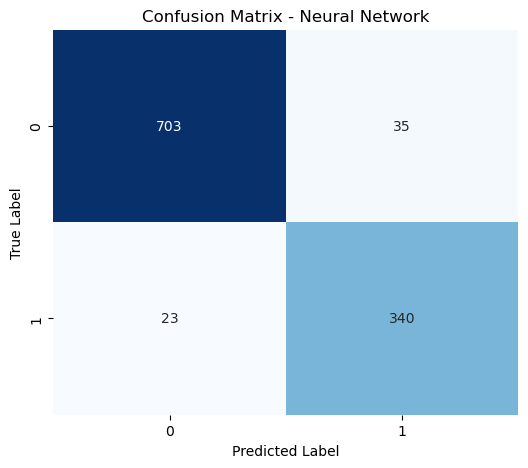

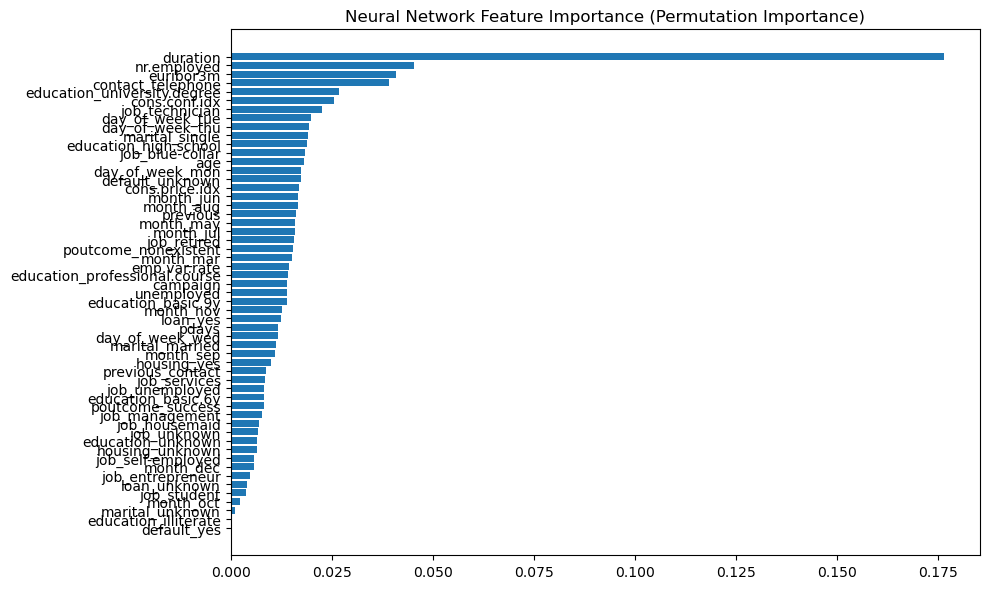

In [10]:
# Bu Neural Network model için pipeline

nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add this scaling step first
    ('classifier', MLPClassifier(random_state=53))
])

nn_param_grid = {
    'classifier__hidden_layer_sizes': [(100,), (100, 50), (100, 100, 50)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__solver': ['adam'],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__learning_rate': ['adaptive'],  # Adaptive is better for convergence
    'classifier__max_iter': [500],  # Increase iterations
    'classifier__early_stopping': [True],  # Add early stopping
    'classifier__n_iter_no_change': [10]  # Stop if no improvement after 10 epochs
}

print("Training Neural Network model")
start_time = time.time()

# To train the neural network model, I will use GridSearchCV
# to find the best parameters.
nn_grid = GridSearchCV(nn_pipeline, nn_param_grid, cv=5, scoring='f1', n_jobs=-1)
nn_grid.fit(X_train, y_train)
nn_time = time.time() - start_time

# Get the best model and make predictions
# After the grid search, we can get the best model and make predictions.
nn_best = nn_grid.best_estimator_
nn_predictions = nn_best.predict(X_test)
nn_proba = nn_best.predict_proba(X_test)[:, 1]

# Calculate metrics
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)
nn_auc = roc_auc_score(y_test, nn_proba)

print(f"Neural Network Best Parameters: {nn_grid.best_params_}")
print(f"Neural Network Metrics:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"F1 Score: {nn_f1:.4f}")
print(f"AUC-ROC: {nn_auc:.4f}")
print(f"Training time: {nn_time:.2f} seconds\n")
print(classification_report(y_test, nn_predictions))

# Confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, nn_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
# For the neural network model, we can use permutation importance
# to get the feature importance.

plt.figure(figsize=(10, 6))
result = permutation_importance(
    nn_best, X_test, y_test, n_repeats=10, random_state=53, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()

plt.title('Neural Network Feature Importance (Permutation Importance)')
plt.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.tight_layout()
plt.show()

##### 5.4 Comparing all the models that we trained.

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC  \
0  Logistic Regression  0.876476   0.783042  0.865014  0.821990  0.947113   
1        Random Forest  0.968211   0.938503  0.966942  0.952510  0.995976   
2       Neural Network  0.947321   0.906667  0.936639  0.921409  0.975039   

   Training Time (s)  
0           9.561505  
1          14.824698  
2          35.400910  

The best model based on F1 score is Random Forest with an F1 score of 0.9525


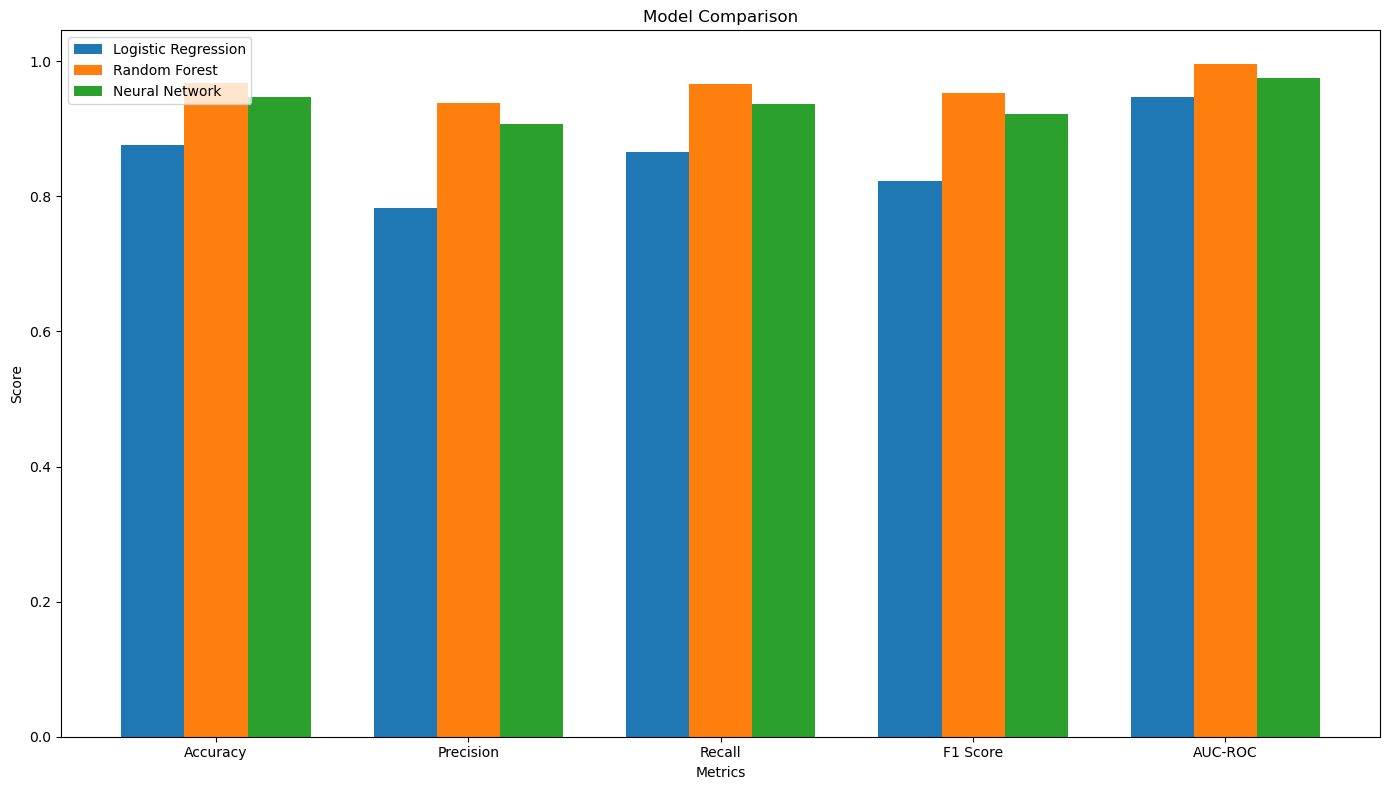

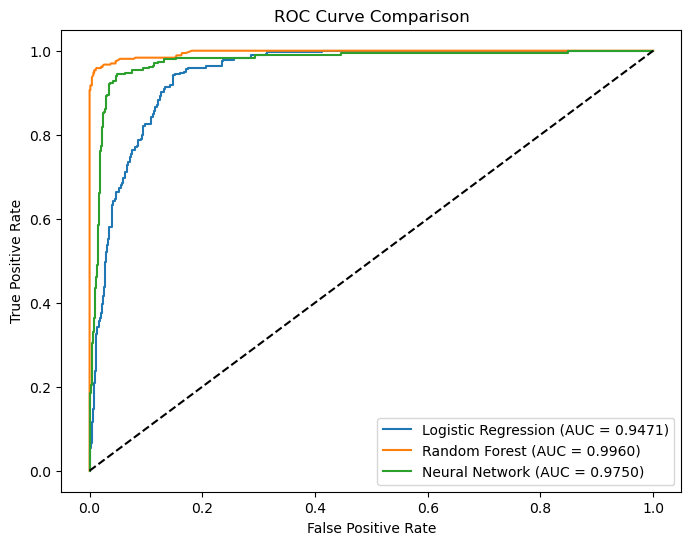

In [11]:
# This is the block where we compare all of our best models.

models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracy_scores = [lr_accuracy, rf_accuracy, nn_accuracy]
precision_scores = [lr_precision, rf_precision, nn_precision]
recall_scores = [lr_recall, rf_recall, nn_recall]
f1_scores = [lr_f1, rf_f1, nn_f1]
auc_scores = [lr_auc, rf_auc, nn_auc]
training_times = [lr_time, rf_time, nn_time]

# DataFrame for comparison created.
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'AUC-ROC': auc_scores,
    'Training Time (s)': training_times
})

print("Model Comparison:")
print(comparison_df)

# Find the best model based on F1 score
# F1 score is a good metric for imbalanced datasets.
# It includes both precision and recall, which is important in this case.
best_model_idx = np.argmax(f1_scores)
best_model_name = models[best_model_idx]
print(f"\nThe best model based on F1 score is {best_model_name} with an F1 score of {f1_scores[best_model_idx]:.4f}")

# Plot comparison graph
plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
metric_values = np.array([accuracy_scores, precision_scores, recall_scores, f1_scores, auc_scores]).T

bar_width = 0.25
x = np.arange(len(metrics))

for i, model in enumerate(models):
    plt.bar(x + i*bar_width, metric_values[i], width=bar_width, label=model)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x + bar_width, metrics)
plt.legend()
plt.tight_layout()
plt.show()

# ROC curve comparison
plt.figure(figsize=(8, 6))
y_score_lr = lr_best.predict_proba(X_test)[:, 1]
y_score_rf = rf_best.predict_proba(X_test)[:, 1]
y_score_nn = nn_best.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_score_nn)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.4f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

##### 5.5 Saving the best model as best_model.pkt by using pickle.

In [13]:
import pickle

# En son model kaydetme bölümüne ekleyin
preprocessing_objects = {
    'cat_cols': categorical_columns,
    'num_cols': numerical_features
}

with open('preprocessing_objects.pkl', 'wb') as file:
    pickle.dump(preprocessing_objects, file)

print(f"Preprocessing nesneleri 'preprocessing_objects.pkl' dosyasına kaydedildi.")
# Based on the F1 score, get the best model
best_models = [lr_best, rf_best, nn_best]
best_model = best_models[best_model_idx]
best_model_name = models[best_model_idx]

# Simply save as best_model.pkl
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"{best_model_name} model successfully saved as 'best_model.pkl'.")

Preprocessing nesneleri 'preprocessing_objects.pkl' dosyasına kaydedildi.
Random Forest model successfully saved as 'best_model.pkl'.


### 6. Creating a Comprehensive ML Pipeline

Now, we'll create a comprehensive machine learning pipeline that includes all the steps from data preprocessing to model training.

In [14]:
class CustomFeaturesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        print("Fitting Custom Features Adder")
        return self
    
    def transform(self, X, y=None):
        X_new = X.copy()
        X_new['previous_contact'] = (X_new['pdays'] != 999).astype(int)
        X_new.loc[X_new["previous_contact"] == 0, "pdays"] = -1
        X_new["unemployed"] = X_new["job"].isin(["student", "retired", "unemployed"]).astype(int)
        
        return X_new

In [15]:
df = df.drop('duration', axis=1)

In [16]:


df_majority = df[df.y == 'no']  # or 0 if your target is binary encoded
df_minority = df[df.y == 'yes']  # or 1 if your target is binary encoded

# First, oversample the minority class to a less extent
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=int(len(df_majority) * 0.5),  # Oversample to 50% of the majority class
                                   random_state=123)

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Define the pipeline with custom feature addition, label encoding, and scaling
pipeline_rf = Pipeline([
    ('feature_adder', CustomFeaturesAdder()),
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Define hyperparameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt']
}

# Instantiate GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=0, n_jobs=-1)

# Separate features and target variable
X = df_oversampled.drop('y', axis=1)
y = df_oversampled['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters for Random Forest:\n", grid_search_rf.best_params_)

# Predict with the best model
best_rf_model = grid_search_rf.best_estimator_
predictions_rf = best_rf_model.predict(X_test)

# Evaluate the best model
print("Accuracy:", accuracy_score(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

Fitting Custom Features Adder
Best hyperparameters for Random Forest:
 {'classifier__max_depth': None, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Accuracy: 0.9582198001816531
              precision    recall  f1-score   support

          no       0.99      0.95      0.97       739
         yes       0.91      0.98      0.94       362

    accuracy                           0.96      1101
   macro avg       0.95      0.96      0.95      1101
weighted avg       0.96      0.96      0.96      1101



In [20]:

with open('full_pipeline.pkl', 'wb') as file:   
     pickle.dump(grid_search_rf.best_estimator_, file)


print("Full pipeline saved as 'full_pipeline.pkl'")

Full pipeline saved as 'full_pipeline.pkl'


### 7. Deploying the model using Streamlit

Now we'll create a Streamlit app to deploy our model. First, we need to save our pipeline and necessary components.

### 10. Requirements file for deployment

Create a requirements.txt file for deployment:

In [21]:
%%writefile requirements.txt
streamlit>=1.26.0
pandas>=2.0.0
numpy>=1.24.0
scikit-learn>=1.0.0
matplotlib>=3.7.0
seaborn>=0.12.0

Overwriting requirements.txt
